# Image Datastores

In [1]:
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.layers import Input

In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

We can create an image dataset with the [image_dataset_from_directory()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) function and set the image_size property.

In [3]:
image_dataset = image_dataset_from_directory("../data/TestImages/", labels=None, image_size=(224, 224), shuffle=False)

Found 6 files belonging to 1 classes.


We can display the images in the dataset.

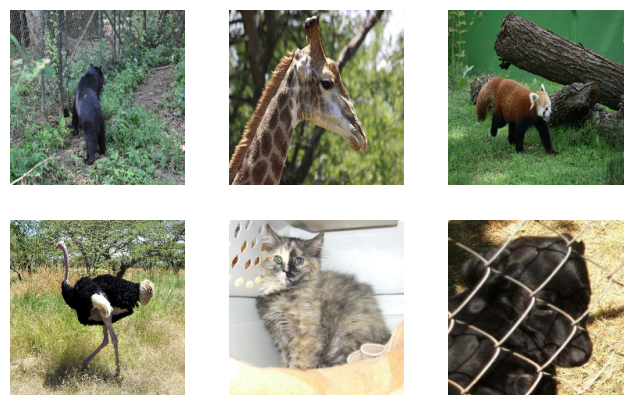

In [4]:
plt.figure(figsize=(8, 5))
for images in image_dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')

We can create an instance of the Inception v3 architecture using the [InceptionV3()](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3) function.

In [5]:
model = InceptionV3(input_tensor=Input(shape=(224, 224, 3)), weights='imagenet', include_top=True)

We first preprocess the images to scale the pixel values between -1 and 1 using the [preprocess_input()](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/preprocess_input) function. We then predict and decode the results to get the labels for an image using the predict() and [decode_predictions()](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/decode_predictions) functions respectively.

In [6]:
preprocessed_images = image_dataset.map(preprocess_input)
predictions = model.predict(preprocessed_images, verbose=0)

labels_probabilities = list()
i = 0
for label_probability in decode_predictions(predictions, top=1):
    label, probability = label_probability[0][1:3]
    labels_probabilities.append((label, probability))

We can display the images with their respective predicted label and probability.

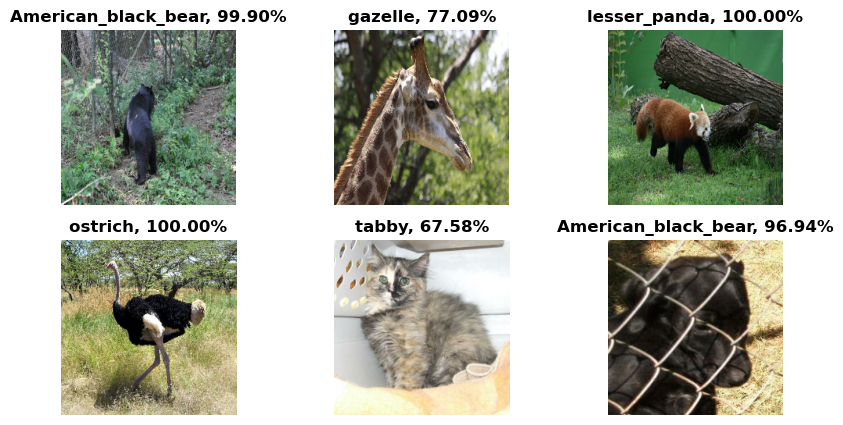

In [7]:
plt.figure(figsize=(10, 5))
for images in image_dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("{}, {:.2f}%".format(labels_probabilities[i][0], labels_probabilities[i][1]*100))
        plt.axis('off')